<h1 style="text-align: center;">Predict used cars price in Saudi Arabia's</h1>
<h3 style="text-align: center;">Ghaisan Rabbani</h3>

---

## **Section 1. Business Understanding**

### **1.1 Context**

syarah.com adalah sebuah platform online untuk jual-beli mobil baru dan bekas bergaransi yang melayani seluruh wilayah Arab Saudi.

Aplikasi ini menyasar dua segmen pelanggan:
- Pelanggan yang ingin menjual mobil bekas.
- Pelanggan yang ingin membeli mobil, baik itu mobil baru maupun bekas.

syarah.com menyediakan beragam pilihan mobil yang dapat disesuaikan dengan kebutuhan pelanggan. Pelanggan dapat memilih mobil berdasarkan spesifikasi yang diinginkan serta menyesuaikannya dengan anggaran yang mereka miliki. Di dalam situs syarah.com, terdapat berbagai fitur yang mencakup informasi penting setiap mobil, seperti nama merek, model, tahun produksi, asal mobil,  opsi tambahan, kapasitas mesin, jenis bahan bakar, tipe transmisi, jarak tempuh (mileage), wilayah, serta opsi harga yang bisa dinegosiasikan. Tentunya, harga mobil sangat dipengaruhi oleh fitur-fitur tersebut. Penetapan harga yang tepat menjadi sangat penting bagi pelanggan karena akan berdampak langsung pada pendapatan yang diperoleh.

**keuntungan syarah.com karena biar pelanggan pada jual mobil di syarah.com**








### **1.2 Problem Statements**

Sulitnya menentukan harga mobil bekas yang akurat dan kompetitif karena banyaknya variasi dan spesifikasi mobil. Tidak terjadi underprice maupun overprice dalam penentuan harga. Tantangan adalah **mengoptimalkan harga mobil bekas melalui platform online**.

### **1.3 Goals**

Tujuan dari model pembelajaran mesin khusus ini adalah 
- untuk memberikan rekomendasi harga yang paling akurat dengan mempertimbangkan fitur-fitur ini
- melihat pengaruh dari setiap fitur terhadap harga yang telah ditentukan

### **1.4 Analytical Approach**

Dalam menghadapi permasalahan tersebut, langkah yang perlu dilakukan adalah menganalisis data untuk menemukan pola-pola dari fitur-fitur yang membedakan harga satu mobil dengan mobil lainnya. Selanjutnya, kita akan membangun model regresi sebagai alat bantu untuk mendukung marketplace dalam membuat keputusan yang lebih tepat dalam memprediksi harga mobil bekas. Tujuan utamanya adalah menciptakan model yang efektif untuk membantu marketplace, meningkatkan kepuasan pelanggan saat bertransaksi melalui platform, dan memastikan perusahaan memperoleh keuntungan secara optimal.

### **1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

**business metric**<br>
Business metrics yang digunakan untuk mengukur dan menganalisis total pendapatan (revenue) yang diperoleh dari penjualan mobil, sehingga membantu dalam mengevaluasi kinerja penjualan dan pertumbuhan bisnis.

**machine learning evaluation metric**<br>
Beberapa metrik evaluasi yang akan digunakan untuk menilai performa model adalah sebagai berikut:

- R-Squared (R²): Indikasi seberapa baik model mampu menjelaskan variasi data yang ada. Nilai R² yang lebih tinggi menunjukkan model yang lebih baik dalam menjelaskan hubungan antara fitur dan target.

- MAE (Mean Absolute Error): Mengukur rata-rata selisih absolut antara prediksi dan nilai aktual. MAE memberikan gambaran seberapa besar kesalahan prediksi model dalam satuan yang sama dengan target (harga mobil bekas).

- RMSE (Root Mean Squared Error): RMSE memberikan gambaran lebih jelas mengenai dampak kesalahan yang lebih besar dalam prediksi. Metrik ini sensitif terhadap outlier, sehingga sangat berguna dalam evaluasi model yang berpotensi menghasilkan prediksi ekstrem.

- MAPE (Mean Absolute Percentage Error): Mengukur seberapa besar persentase kesalahan dalam prediksi model, memberikan perspektif yang lebih mudah dipahami dalam konteks nilai relatif.

Dari metrik ini, R² akan menjadi metrik utama yang digunakan untuk mengevaluasi keberhasilan model, sementara metrik lainnya (MAE, MSE, RMSE, MAPE) digunakan untuk menggali lebih dalam seberapa besar dan konsisten kesalahan yang dihasilkan oleh model.

**relevansikan dengan bisnis**

### **1.6 Success Criteria**

ketika nilai MAE, RMSE, MAPE memiliki nilai yang kecil

**hal yang harus dipenuhi yang dianggap project berhasil**

## **Section 2. Data Understanding**

In [210]:
#manipulation data
import pandas as pd
import numpy as np

#visualisasi data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

#statistic
import statsmodels.api as sm

#missing values
import missingno as msno

#machine learning (sklearn)
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from category_encoders import BinaryEncoder
from feature_engine.encoding import RareLabelEncoder

#model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.base import BaseEstimator, TransformerMixin


In [211]:
df = pd.read_csv(r'C:\Users\ghais\OneDrive\Documents\Purwadhika bootcamp\Modul 3. machine learning\Capstone\Predict-used-cars-price-in-Saudi-Arabia-s\data\raw\data_saudi_used_cars.csv')
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


### **2.1 General Information**

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


Based on the information above, it is known that in the dataset there are 11 columns with 5624 rows. The column types are as follows:
- 6 Object data types ( Type, Region, Make, Gear_Type, Origin, Options )
- 4 Numeric data types ( Year, Engine_Size, Mileage, Price )
- 1 Boolean data types ( Negotiable )

### **2.2 Feature Information**

| Feature         | Description                                            | Impact to business                                 |
|-----------------|--------------------------------------------------------|----------------------------------------------------|
| **Type**        | Type of used car                                       | Determining the types that are popular in market   |
| **Region**      | The region in which the used car was offered for sale  | Understanding sales trends by location             |
| **Make**        | The company name                                       | Find out the most popular car brands               |
| **Gear_Type**   | Gear type size of used car                             | Determining customer preference (auto or manual)   |
| **Origin**      | Origin of used car                                     | Helps determine customers are interested in (local)|
| **Options**     | Options of used car                                    | Determining car values that can increase the price |
| **Year**        | Manufacturing years                                    | year of production affects for price and demand    |
| **Engine_Size** | The engine size of used car                            | Determine buyer interest based on vehicle needs    |
| **Mileage**     | Mileage of used car                                    | The kilometers traveled affect the selling price   |
| **Negotiable**  | True if the price is 0, that means it is negotiable    | Demonstrate pricing flexibility                    |
| **Price**       | Price used cars                                        | important factors for buyers                       |

### **2.3 Statistics Summary**

In [213]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


- If it is seen that there is 25% of used car data with a price of 0, it will be followed up.
- The Mileage column has a maximum value of 20 million miles (32.2 million kilometers), which is highly unrealistic for most private vehicles.

In [214]:
df.describe(include=object)

,Type,Region,Make,Gear_Type,Origin,Options
count,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2272,1431,4875,4188,2233


## **Section 3. Data Cleaning**

The data cleaning process is carried out to prepare the data to be analyzed. There are five stages that will be carried out in the data cleaning process:

- **Feature selection**: Eliminate irrelevant features and anomalous values.
- **Missing values**: Address missing values by deletion or imputation.
- **Duplicate values**: Remove duplicate entries.
- **Spelling Error**: Standardize spellings and correct errors.
- **Handling Outlier**: Detect and resolve the outlier.


### **3.1 Feature selection**

The **"Negotiable"** column and data with **"Price=0"** were removed because they are not helpful in predicting prices. A price of 0 usually means negotiations are ongoing.

In [215]:
print("total data Negotiable: ",(df['Negotiable']==True).sum())

total data Negotiable:  1796


In [216]:
df= df.drop(df[df['Price'] == 0].index)
df= df.drop('Negotiable', axis = 1)

### **3.2 Missing Values**

total missing values in dataframe:  0


Type           0 - (0.00%)
Region         0 - (0.00%)
Make           0 - (0.00%)
Gear_Type      0 - (0.00%)
Origin         0 - (0.00%)
Options        0 - (0.00%)
Year           0 - (0.00%)
Engine_Size    0 - (0.00%)
Mileage        0 - (0.00%)
Price          0 - (0.00%)
dtype: object

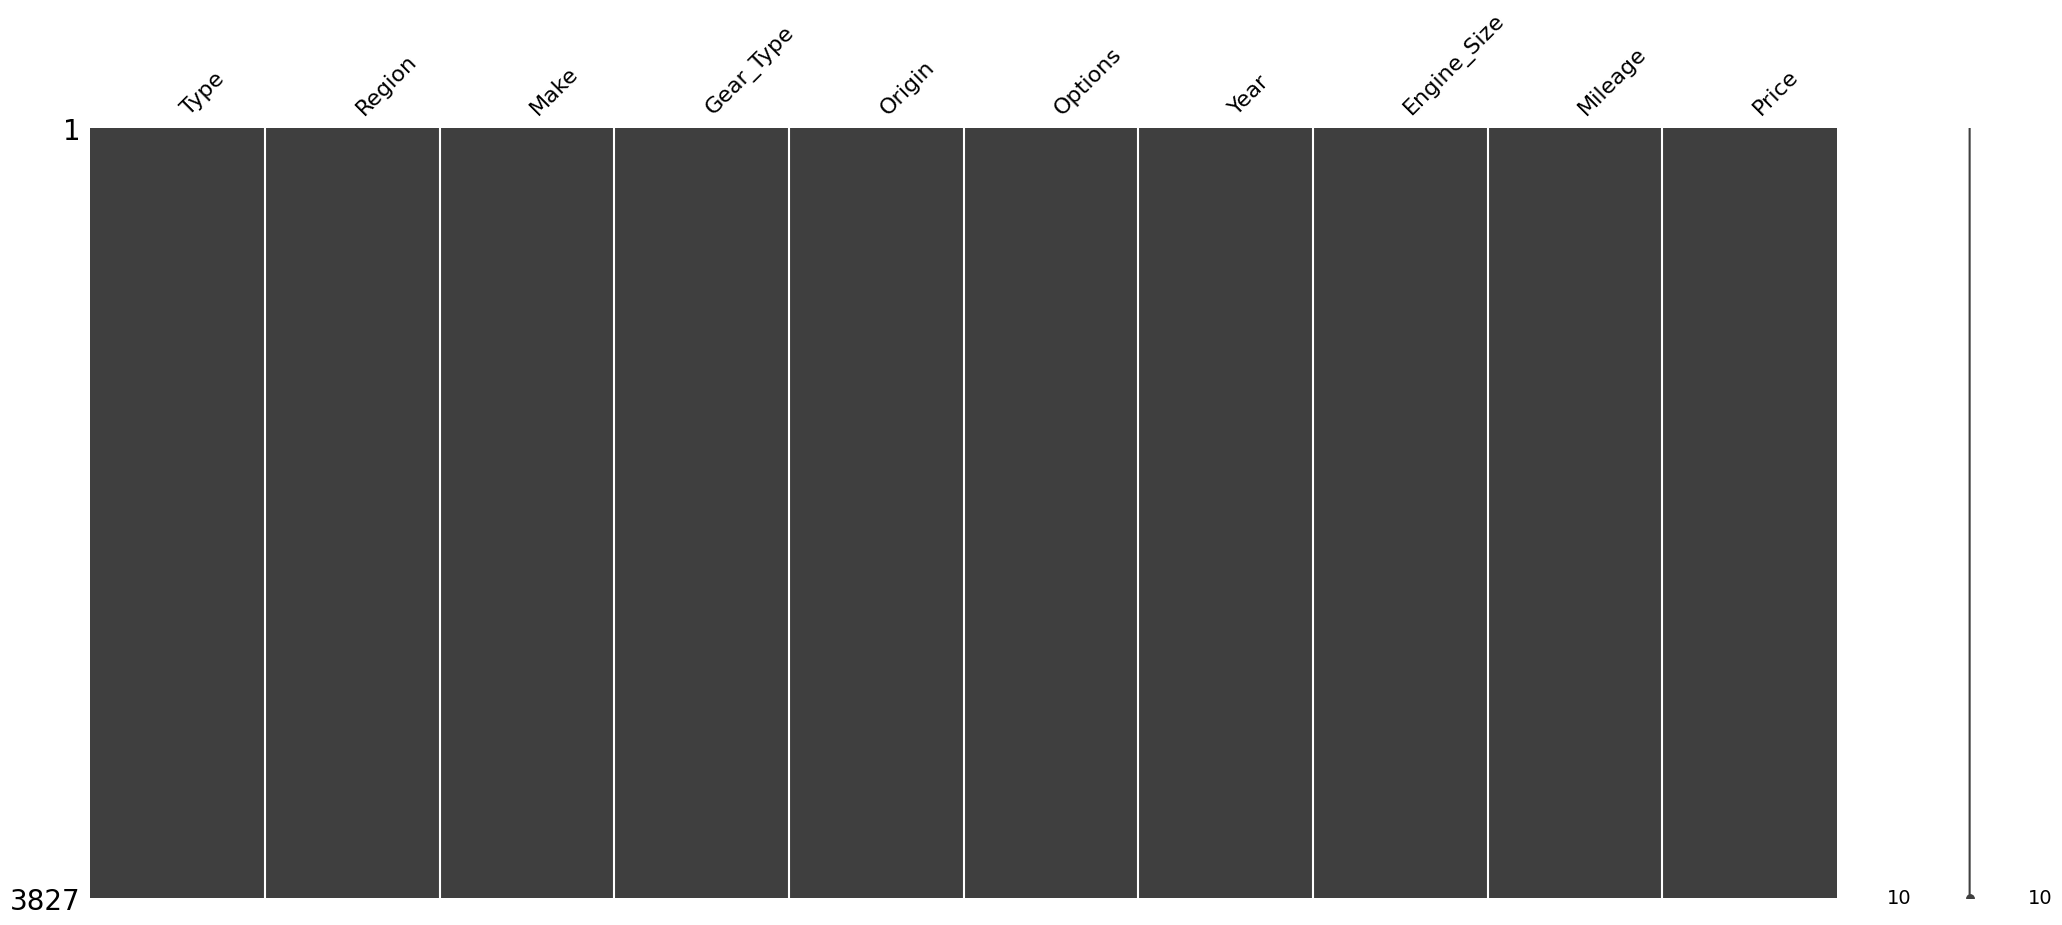

In [217]:
msno.matrix(df)
print("total missing values in dataframe: ",df.isna().sum().sum())
df.isnull().sum().apply(lambda x: f'{x} - ({x/len(df):.2%})')

This dataset does **not have any missing values**

### **3.3 Duplicated Values**

In [218]:
print("total duplicated data in dataframe:",df.duplicated().sum())

total duplicated data in dataframe: 3


**Duplicate data will be removed** from its value because it has the same information to be learned in machine learning, so it can increase the efficiency and performance of machine learning.

In [219]:
# Drop duplicate data
df.drop_duplicates(inplace=True)

# Cek duplicate data
print("Number of duplicate rows: ", sum(df.duplicated()))

Number of duplicate rows:  0


### **3.4 Spelling Error**

In [220]:
listItem = []
for i, col in enumerate(df.columns):
    listItem.append([col, df[col].nunique(), list(df[col].drop_duplicates().values)])

df_desc = pd.DataFrame(data=listItem, columns=['Features', 'Nunique', 'Unique Name'])
df_desc

,Features,Nunique,Unique Name
0,Type,320,"[Yukon, Range Rover, Optima, CX3, Cayenne S, S..."
1,Region,27,"[Riyadh, Hafar Al-Batin, Abha, Makkah, Dammam,..."
2,Make,56,"[GMC, Land Rover, Kia, Mazda, Porsche, Hyundai..."
3,Gear_Type,2,"[Automatic, Manual]"
4,Origin,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,3,"[Full, Semi Full, Standard]"
6,Year,41,"[2014, 2015, 2019, 2012, 2016, 2013, 2011, 200..."
7,Engine_Size,65,"[8.0, 5.0, 2.4, 2.0, 4.8, 3.5, 5.7, 4.6, 4.0, ..."
8,Mileage,1346,"[80000, 140000, 220000, 25000, 189000, 155, 11..."
9,Price,466,"[120000, 260000, 42000, 58000, 85000, 48000, 8..."


**"Origin"** column needs to be improved. The **"Unknown"** value can be replaced with **"Other"** to improve data consistency.

In [221]:
df.groupby('Origin').count()

,Type,Region,Make,Gear_Type,Options,Year,Engine_Size,Mileage,Price
Origin,,,,,,,,,
Gulf Arabic,495,495,495,495,495,495,495,495,495
Other,420,420,420,420,420,420,420,420,420
Saudi,2893,2893,2893,2893,2893,2893,2893,2893,2893
Unknown,16,16,16,16,16,16,16,16,16


Because Rows **"Other" > "Unknown"**, then the **"Unknown"** value will be changed to **"Other"**

In [222]:
df['Origin'] = df['Origin'].replace('Unknown', 'Other')
print("Origin Values : ",df['Origin'].unique())

Origin Values :  ['Saudi' 'Gulf Arabic' 'Other']


### **3.5 Handling Outlier**

**Numerical Values**
- Year
- Engine_Size
- Mileage
- Price

In [223]:
num_features= df.select_dtypes('number').columns

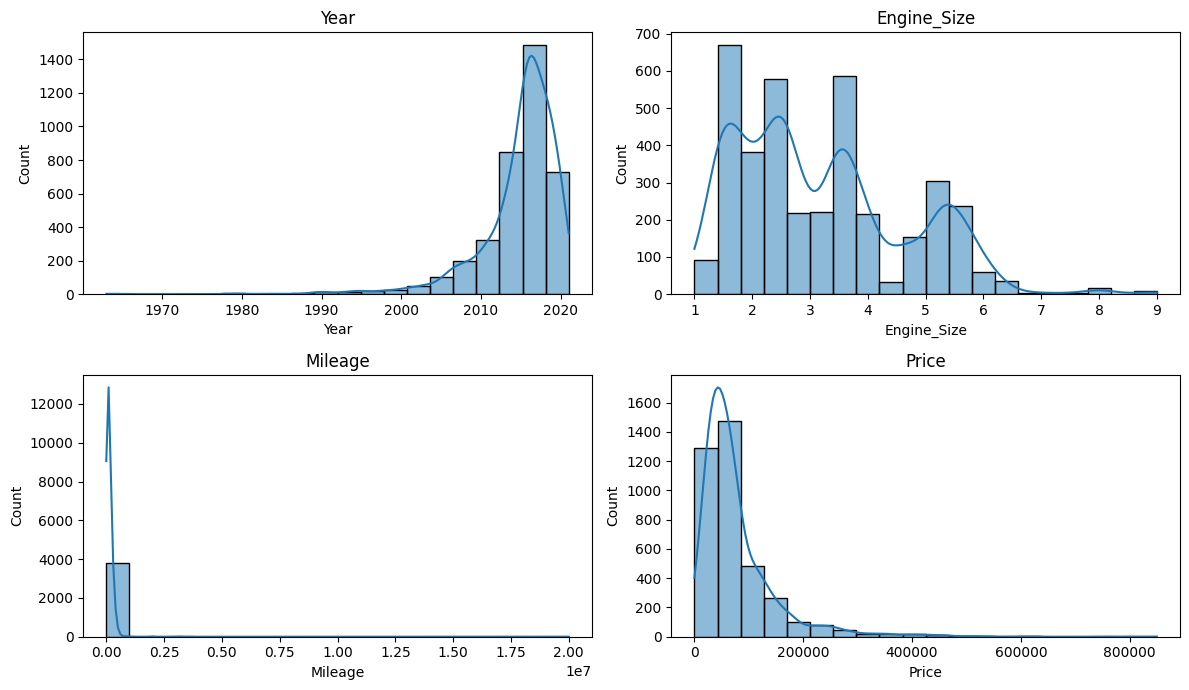

In [224]:
#Distribution for Numerical Features
plt.figure(figsize=(12,7))
for idx,feature in enumerate(df[num_features].columns, start=1):
    sns.histplot(df[feature], bins=20, kde=True, ax=plt.subplot(2,2,idx))
    plt.subplot(2,2,idx).set_title(feature)
plt.tight_layout()
plt.show()

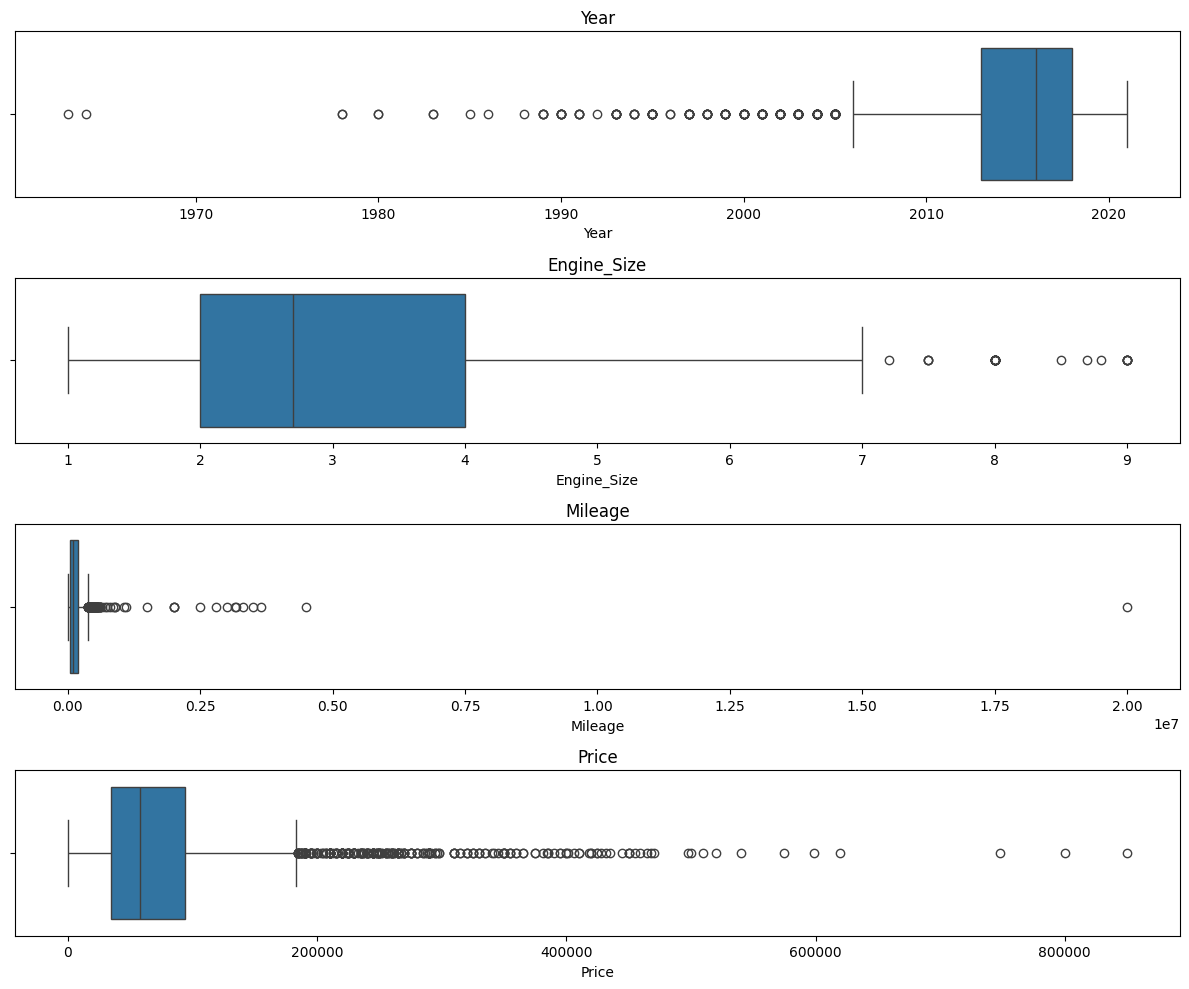

In [225]:
#Box Plot for Numerical Features

plt.figure(figsize=(12,10))
for idx,feature in enumerate(df[num_features].columns, start=1):
    sns.boxplot(x=df[feature], ax=plt.subplot(4,1,idx))
    plt.subplot(4,1,idx).set_title(feature)
plt.tight_layout()
plt.show()

There are some outliers in each feature, so to handle this, data processing is carried out using the IQR method and understanding of the domain context.

- **Year**

In [226]:
pd.DataFrame(df['Year'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Year,3824.0,2014.851203,5.110916,1963.0,2013.0,2016.0,2018.0,2021.0


**Year=1963** for used cars is too long, so it needs to be investigated.

In [227]:
# Sort by ascending year
df.sort_values(by='Year', ascending=True).head(5).reset_index(drop=True)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Other,Riyadh,Ford,Manual,Saudi,Standard,1963,1.0,300,22000
1,Impala,Al-Ahsa,Chevrolet,Automatic,Other,Full,1964,1.2,100000,75000
2,Patrol,Abha,Nissan,Manual,Saudi,Standard,1978,4.0,30000,28000
3,Land Cruiser 70,Riyadh,Toyota,Manual,Saudi,Standard,1978,4.0,400000,18000
4,S,Riyadh,Mercedes,Automatic,Other,Standard,1980,3.0,160000,40000


if it is seen in the table that a used car in **1963 cannot have a Mileage value of 300**, then it is an outlier. so it will be **drop year<2000**

**Drop Year<2000, Reason :**
- if it is seen on the histogram that the graph shows **negative skewness**, this indicates that used cars under 2000 are rarely sold. then limitation will be done by **deleting data that has a year under 2000** because the information of the discarded data is not too much.
- By domain knowledge In Saudi Arabia, people often prefer to buy a new car or the latest model. This preference is influenced by factors such as the climate, the need for fuel efficiency, frequent daily driving and the country's strict emission regulations.

In [228]:
print("Total data with (Year<2000): ",df[df['Year'] < 2000].shape[0])

Total data with (Year<2000):  74


In [229]:
#Drop data with (Year<2000)
df=df[df['Year']>=2000]
df.sort_values(by='Year', ascending=True).head(5).reset_index(drop=True)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Maxima,Jeddah,Nissan,Manual,Saudi,Standard,2000,3.5,400000,12500
1,S,Dammam,Mercedes,Automatic,Saudi,Semi Full,2000,3.0,100,15000
2,ML,Jeddah,Mercedes,Automatic,Saudi,Full,2000,3.3,111744,18000
3,Suburban,Aseer,GMC,Automatic,Saudi,Semi Full,2000,6.0,128000,80000
4,Grand Marquis,Dammam,Mercury,Automatic,Saudi,Semi Full,2000,3.8,179000,14000


- **Engine_Size**

In [230]:
pd.DataFrame(df['Engine_Size'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Engine_Size,3750.0,3.170747,1.456528,1.0,2.0,2.7,4.0,9.0


**Engine_Size=9** is a value that is rarely found, so it needs to be investigated.

In [231]:
df.sort_values(by='Engine_Size', ascending=False).head(10).reset_index(drop=True)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Camry,Taef,Toyota,Automatic,Saudi,Semi Full,2001,9.0,150000,15000
1,Camry,Jeddah,Toyota,Automatic,Saudi,Semi Full,2014,9.0,106000,36000
2,Sierra,Dammam,GMC,Automatic,Saudi,Full,2021,9.0,100,178000
3,FJ,Hail,Toyota,Automatic,Saudi,Full,2014,9.0,308000,75000
4,E,Jeddah,Mercedes,Manual,Other,Semi Full,2017,9.0,134000,155000
5,Marquis,Riyadh,Ford,Automatic,Other,Full,2008,9.0,115,17000
6,G,Riyadh,Mercedes,Automatic,Saudi,Full,2015,8.8,213000,240000
7,Range Rover,Jeddah,Land Rover,Automatic,Saudi,Semi Full,2013,8.7,177,88000
8,Dyna,Riyadh,Isuzu,Manual,Saudi,Standard,2003,8.5,330,40000
9,Other,Qassim,Other,Manual,Other,Full,2019,8.0,24643,330000


**Drop Engine_Size>=8, Reason :**
- unpredictable price due to engine_size so that it will produce bias in machine learning.
- based on domain knowledge that it is rare and almost never for engine_size with a size greater than 8.
    - City Cars: Small engines (1000-1500 cc) for fuel efficiency.
    - Family Cars: Medium engines (1500-2500 cc), balanced power and efficiency.
    - Sports Cars: Large engines (3000+ cc), high power and torque.
    - Trucks & SUVs: Very large engines (4000+ cc), high towing capacity.

In [232]:
print("Total data with (Engine_Size>=8): ",df[df['Engine_Size']>=8].shape[0])

Total data with (Engine_Size>=8):  25


In [233]:
#Drop data with (Engine_Size>=8)
df=df[df['Engine_Size']<8]
df.sort_values(by='Engine_Size', ascending=False).head(5)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
963,D-MAX,Abha,Isuzu,Manual,Saudi,Full,2019,7.5,40000,125000
750,LX,Taef,Lexus,Automatic,Gulf Arabic,Full,2018,7.5,122000,340000
3010,FJ,Aseer,Toyota,Automatic,Saudi,Full,2017,7.5,138000,118000
1400,Yukon,Makkah,GMC,Automatic,Saudi,Full,2008,7.2,299000,30000
1429,Dyna,Dammam,Isuzu,Manual,Saudi,Standard,2013,7.0,300,82000


- **Mileage**

In [234]:
pd.DataFrame(df['Mileage'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Mileage,3725.0,139932.471678,371984.804364,100.0,49000.0,103000.0,181000.0,20000000.0


**mileage value of 2000000 is very unreasonable**, so it needs to be investigated.

In [235]:
df.sort_values(by='Mileage', ascending=False).head(20).reset_index(drop=True)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Optra,Riyadh,Chevrolet,Manual,Other,Semi Full,2009,1.6,20000000,9000
1,Innova,Riyadh,Toyota,Manual,Saudi,Standard,2013,2.7,3640000,30000
2,Trailblazer,Jeddah,Chevrolet,Automatic,Other,Full,2004,5.3,3500000,10000
3,Tahoe,Riyadh,Chevrolet,Automatic,Saudi,Semi Full,2008,5.7,3300000,27000
4,Pathfinder,Riyadh,Nissan,Automatic,Saudi,Full,2008,2.6,3150000,20000
5,Fusion,Hail,Ford,Automatic,Saudi,Full,2010,2.5,3000000,17000
6,Prado,Makkah,Toyota,Manual,Saudi,Semi Full,2006,4.0,2800000,35000
7,Marquis,Riyadh,Ford,Automatic,Saudi,Semi Full,2005,4.6,2500000,9000
8,Range Rover,Jeddah,Land Rover,Automatic,Saudi,Full,2009,2.4,2013000,35000
9,Optima,Riyadh,Kia,Automatic,Saudi,Full,2014,2.5,2002500,42000


Used cars with **mileage worth 2000000 have a year 2009 which does not make sense**. Mileage calculations will be made based on the smallest year of data.

In [236]:
print("Min Year used cars in dataset: ",df['Year'].min(), ", So this dataset is based on the years 2000 until now")

Min Year used cars in dataset:  2000 , So this dataset is based on the years 2000 until now


$$
2024  - 2000 = 24\text{ year}
$$

**Drop Mileage>=600.000, Reason :**

Based on the latest research data, cars in Saudi Arabia only travel about 16,000 miles or 25,000 kilometers per year. Therefore, the figure of 2,000,000 miles for a 2009 car is very unreasonable. So, it needs to be handled by dropping the data, with the following calculation:

$$
25.000 \text{ km/year} \times 24 \text{ year} = 600.000 \text{ km}
$$

References: **https://www.sciencedirect.com/science/article/pii/S0140988320303662**



In [237]:
print("Total data with (Mileage>=600000): ",df[df['Mileage']>=600000].shape[0])

Total data with (Mileage>=600000):  21


In [238]:
#Drop data with (Mileage>=600000)
df=df[df['Mileage']<600000]
df.sort_values(by='Mileage', ascending=False).head(5)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
2663,Hiace,Riyadh,Toyota,Manual,Saudi,Standard,2010,2.7,573000,37000
5140,D-MAX,Dammam,Isuzu,Manual,Saudi,Standard,2007,2.5,570000,27000
1640,Grand Marquis,Riyadh,Mercury,Automatic,Other,Full,2007,4.6,570000,24000
772,Hiace,Riyadh,Toyota,Manual,Saudi,Standard,2017,2.7,555555,73000
2614,Camry,Jeddah,Toyota,Manual,Saudi,Standard,2010,2.0,550000,20000


- **Price**

In [239]:
pd.DataFrame(df['Price'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Price,3704.0,78991.034827,72707.609363,1.0,36000.0,58500.0,95000.0,850000.0


- Price that has a value of 1 makes no sense, this is the same as giving the car to the seller. 
- is the used car price 850000.0 reasonable.

of the above problems,then it needs to be investigated

In [240]:
desc_price=df.sort_values(by='Price', ascending=False).head(5).reset_index(drop=True)
asc_price=df.sort_values(by='Price', ascending=True).head(5).reset_index(drop=True)

display(asc_price,desc_price)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,1
1,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,500
2,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,850
3,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,884
4,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6,85000,950


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,850000
1,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,800000
2,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,748000
3,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,620000
4,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2019,5.0,4200,599000


the price of 1, 500, ... does not make sense when viewed from the bottom but when viewed from the top the value of 850000 makes sense because it is seen from all the colums, then a limitation will be made for the price.

**Drop Price<5000, Reason :**
- if maintained, the machine learning results for prediction will result in a decrease in accuracy.
- If you look at used car sales websites, **the lowest average price is 5,000**.

references : [Syarah.com](https://syarah.com/), [YallaMotor.com](https://ksa.yallamotor.com/)



In [241]:
print("Total data with (Price<5000): ",df[df['Price']<5000].shape[0])

Total data with (Price<5000):  66


In [242]:
#Drop data with (Price>=5000)
df=df[df['Price']>=5000]
df.sort_values(by='Price', ascending=True).head(5)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
693,Accent,Dammam,Hyundai,Manual,Saudi,Standard,2005,1.5,294602,5000
3482,Caprice,Riyadh,Chevrolet,Automatic,Saudi,Standard,2006,3.6,380000,5000
3052,Expedition,Al-Medina,Ford,Automatic,Saudi,Semi Full,2003,5.4,400000,5000
1629,Other,Jeddah,Other,Manual,Other,Semi Full,2021,1.2,3000,5500
5432,Optima,Taef,Kia,Manual,Other,Standard,2006,1.3,290000,6000


### 3.6 Summary


**Total dataset before drop : 5624**

**Total dataset after drop : 3638**



In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3638 entries, 2 to 5622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3638 non-null   object 
 1   Region       3638 non-null   object 
 2   Make         3638 non-null   object 
 3   Gear_Type    3638 non-null   object 
 4   Origin       3638 non-null   object 
 5   Options      3638 non-null   object 
 6   Year         3638 non-null   int64  
 7   Engine_Size  3638 non-null   float64
 8   Mileage      3638 non-null   int64  
 9   Price        3638 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 312.6+ KB



- **Feature selection:**
The **"Negotiable"** column and data with **"Price=0"** were removed because they are not helpful in predicting prices. and total drop is **1796 data**

- **Missing values:** data with missing values cannot be used in machine learning but there are no missing values in this dataset.

- **Duplicated Values:** Dupicated data can have an effect performance and eficiency in machine learning. Total duplicated data is **3 data** will be removed.

- **Spelling error:** In Origin colums have a value Unknown and other, so I will change Unknown to Other. 

- **Handling Outlier:** Handing outliers is done to improve the accuracy of prediction. there are several steps taken
    - Total drop data with (Year<2000):  74
    - Total drop data with (Engine_Size>=8):  25
    - Total drop data with (Mileage>=600000):  21
    - Total drop data with (Price<5000):  66

## **Section 4. Data Generation**

### **4.1 Constructing `Seen` and `Unseen` Data**

In [244]:
df_seen, df_unseen= train_test_split(df, test_size=0.2, random_state=42)

# Check the shape of the df_seen
df_seen.reset_index(drop=True, inplace=True)
print("total data seen", df_seen.shape)
display(df_seen.head(5))

# Check the shape of the df_unseen
df_unseen.reset_index(drop=True, inplace=True)
print("total data unseen", df_unseen.shape)
display(df_unseen.head(5))

total data seen (2910, 10)


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Sonata,Riyadh,Hyundai,Automatic,Saudi,Standard,2019,2.4,94000,58000
1,CT-S,Al-Medina,Cadillac,Automatic,Saudi,Semi Full,2013,3.8,137000,45000
2,Yaris,Jeddah,Toyota,Automatic,Saudi,Standard,2018,1.5,114000,32000
3,Azera,Dammam,Hyundai,Automatic,Saudi,Semi Full,2019,3.5,44271,95000
4,Suburban,Riyadh,Chevrolet,Automatic,Saudi,Full,2011,5.3,282000,60000


total data unseen (728, 10)


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Ciocca,Riyadh,Toyota,Automatic,Saudi,Standard,2016,5.7,348000,79000
1,C,Dammam,Mercedes,Automatic,Other,Full,2019,2.0,15000,175000
2,D-MAX,Dammam,Isuzu,Manual,Saudi,Standard,2015,2.5,445539,53000
3,Land Cruiser,Aseer,Toyota,Automatic,Saudi,Full,2013,4.6,101000,150000
4,C,Dammam,Mercedes,Automatic,Saudi,Semi Full,2019,2.0,44000,185000


### **4.2 Constructing `Training` and `Testing` Data (from `Seen` Dataset)**

In [245]:
df_train, df_test = train_test_split(df_seen, test_size=0.2, random_state=42)

df_train.reset_index(drop=True, inplace=True)
print("total data train", df_seen.shape)
display(df_seen.head(5))

df_test.reset_index(drop=True, inplace=True)
print("total data test", df_unseen.shape)
display(df_unseen.head(5))

total data train (2910, 10)


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Sonata,Riyadh,Hyundai,Automatic,Saudi,Standard,2019,2.4,94000,58000
1,CT-S,Al-Medina,Cadillac,Automatic,Saudi,Semi Full,2013,3.8,137000,45000
2,Yaris,Jeddah,Toyota,Automatic,Saudi,Standard,2018,1.5,114000,32000
3,Azera,Dammam,Hyundai,Automatic,Saudi,Semi Full,2019,3.5,44271,95000
4,Suburban,Riyadh,Chevrolet,Automatic,Saudi,Full,2011,5.3,282000,60000


total data test (728, 10)


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Ciocca,Riyadh,Toyota,Automatic,Saudi,Standard,2016,5.7,348000,79000
1,C,Dammam,Mercedes,Automatic,Other,Full,2019,2.0,15000,175000
2,D-MAX,Dammam,Isuzu,Manual,Saudi,Standard,2015,2.5,445539,53000
3,Land Cruiser,Aseer,Toyota,Automatic,Saudi,Full,2013,4.6,101000,150000
4,C,Dammam,Mercedes,Automatic,Saudi,Semi Full,2019,2.0,44000,185000


## **Section 5. Exploratory Data Analysis (EDA)**

**Exploratory Data Analysis (EDA)** is used to better understand the data before conducting further analysis.

In this context, the **Price** column serves as the **target**, while the other columns are the **Features**. These features fall into two categories: **numerical variables** and **categorical variables**.

Here are the divisions of these variables:
- **Numeric Variables**: Year, Engine_Size, Mileage, and Price.
- **Categorical Variables**:Type, Region, Make, Gear_Type, Origin, and Options.

as in EDA will be checked against:
1. Data distribution
2. Data correlation
3. The effect of features on the data (relationship)



### **5.1 Analysis distribution data**

**Numerical data**

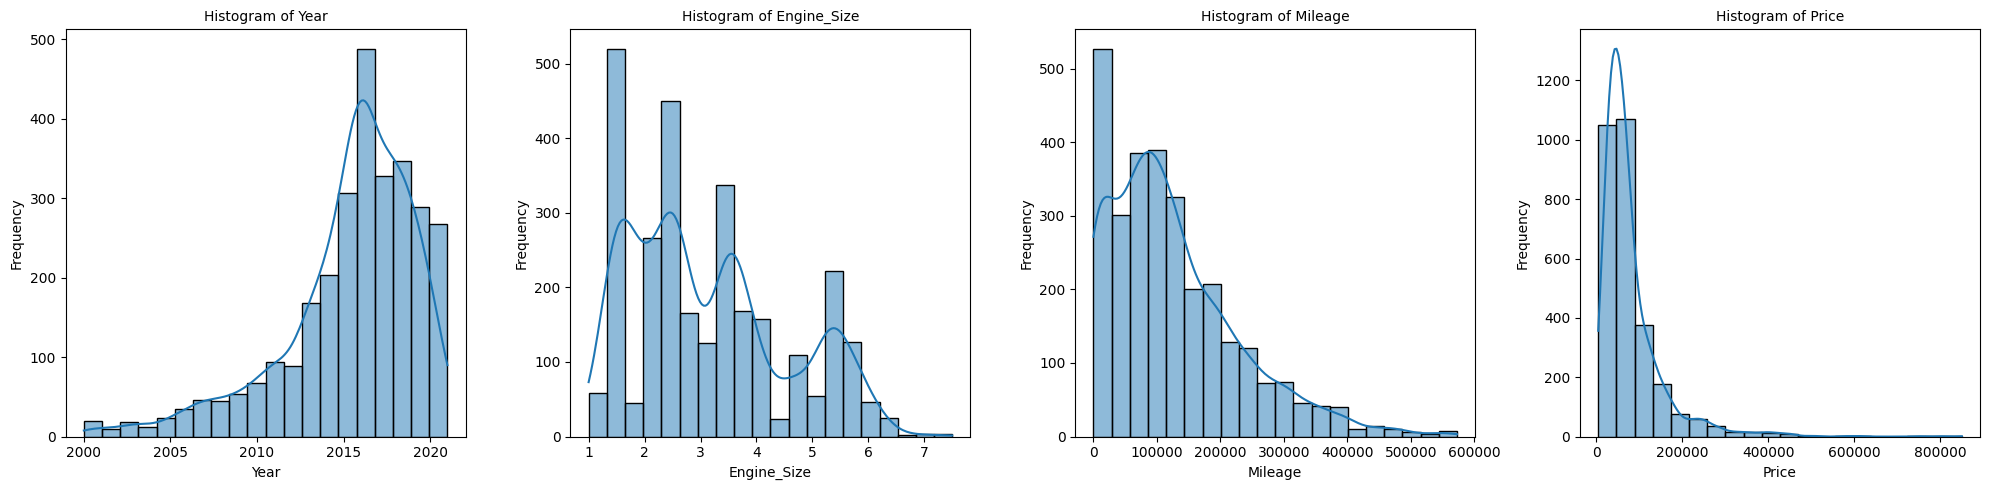

In [246]:
plt.figure(figsize=(20, 5))

for idx, column in enumerate(num_features,start=1):
    sns.histplot(data=df_seen[column], kde=True, bins=20, ax=plt.subplot(1,4,idx))
    plt.subplot(1,4,idx).set_title(f'Histogram of {column}', fontsize=10)
    plt.subplot(1,4,idx).set_xlabel(column)
    plt.subplot(1,4,idx).set_ylabel('Frequency')
plt.tight_layout()
plt.show()

based on the histogram chart above:
- **"Year", "Engine_Size", "Mileage", and "Price"** has a **non-normal distribution**.
- The histogram shows **positive skewness** in the variables **"Engine_Size", "Mileage", and "Price"**. This shows that some of the values are smaller than the average.
- The histogram shows **negative skewness** in the variables **"Year"**. This shows that some of the values are Higher than the average.

**Handling**:
To address the issue of non-normal distribution in numerical data, a **robust scaler** can be employed.

**Categorical data**

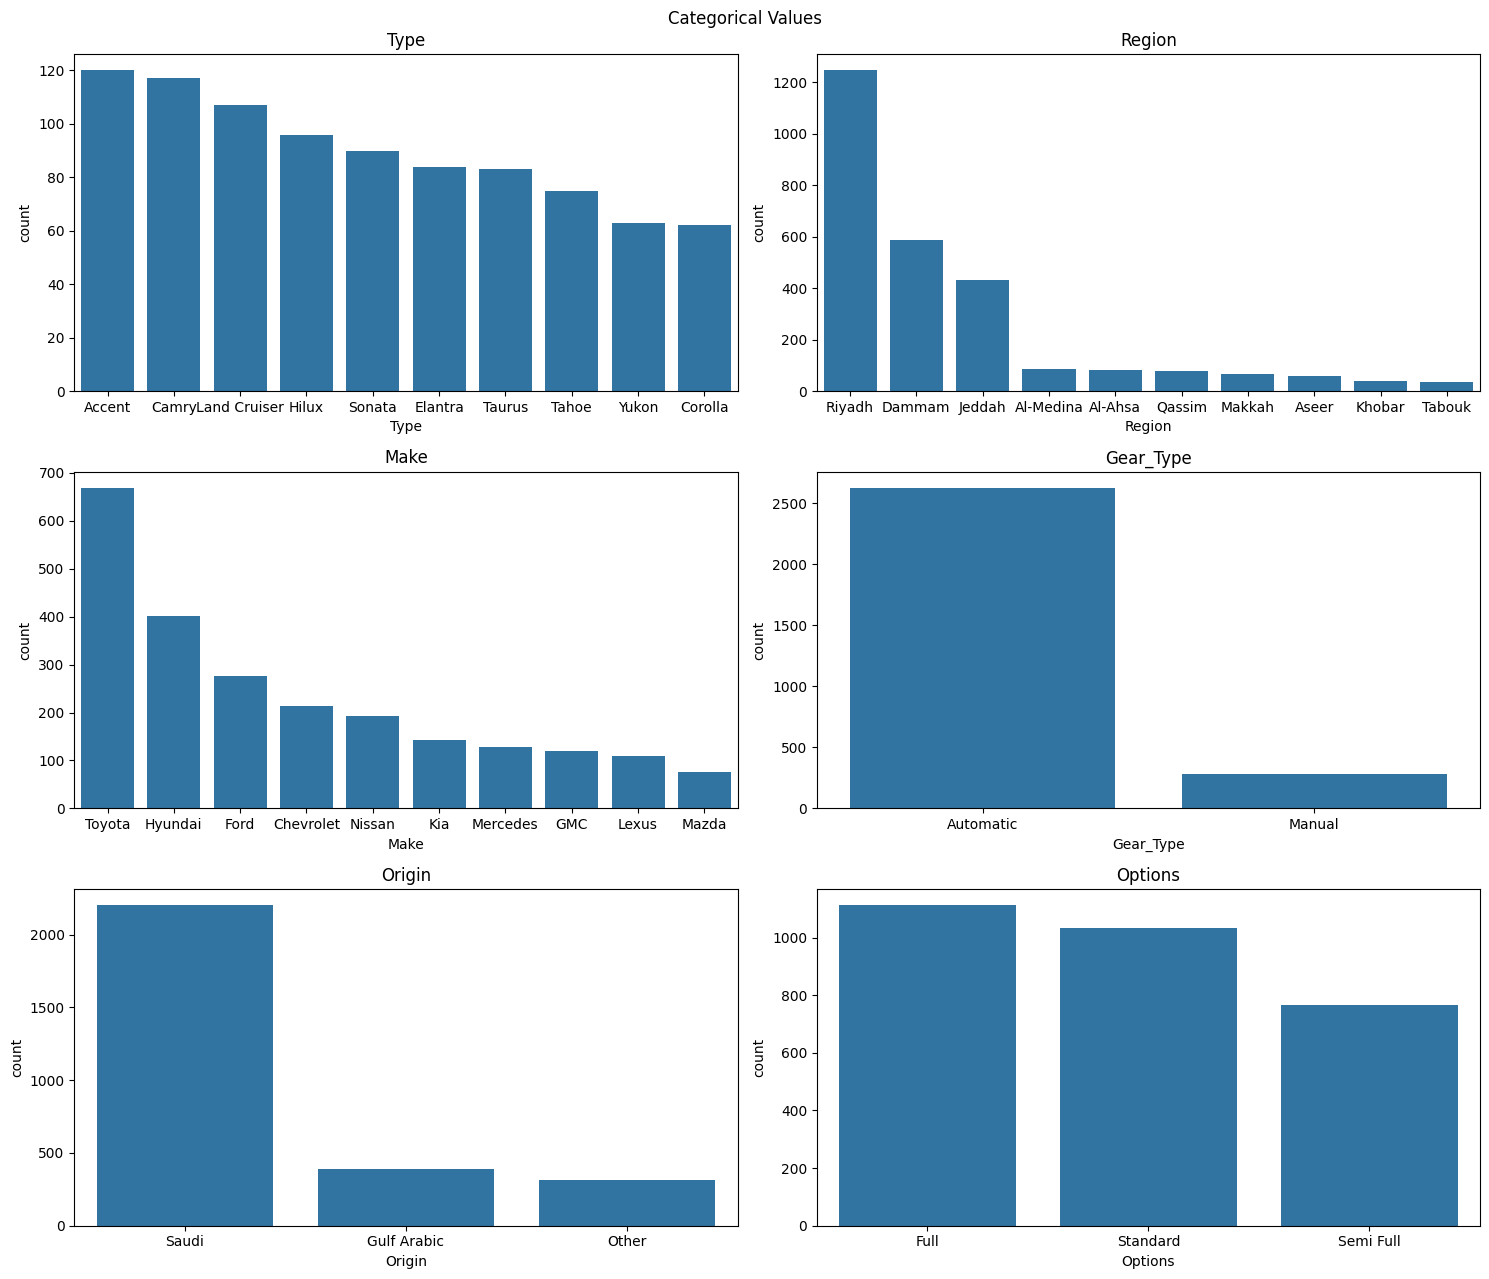

In [247]:
cat_feature= df_seen.select_dtypes(include='object').columns
plt.figure(figsize= (15,13))

for idx, column in enumerate(cat_feature):
      plt.subplot(3,2,idx+1)
      top_categories = df_seen[column].value_counts().head(10).index 
      ax = sns.countplot(data= df_seen, x= df_seen[column],
                         order= top_categories)
      plt.tight_layout()
      plt.title(column)  
plt.suptitle('Categorical Values')
plt.tight_layout()
plt.show()

from the chart above, we found that <br>
- **the dominance of certain brands and models**:
    - Toyota Camry: This model is very popular and dominates the used car market.
    - Other Popular Brands: Apart from Toyota, some other brands like Hyundai and Ford also have a significant market share.
    - Other Models: Other models such as Sonata, Elantra, and Corolla are also quite popular, although not as much as the Camry.
- **Consumer Preferences**:
    - Automatic Transmission: Most consumers prefer cars with automatic transmissions over manual transmissions.
    - Additional Options: Full options are the most sought-after feature by consumers.
    - Car Origin: The majority of used cars for sale originate from the Saudi region.
- **Geographic Distribution**:
    - Concentration in the Riyadh Region: Most of the data comes from the Riyadh region, indicating that the used car market in this region is quite active.
    - Variations Between Regions: There are significant variations in the number of used cars sold in each region.

In [248]:
cat_feature=['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options']

for feature in df_seen[cat_feature].columns:
    print (f'total unique values({feature}): {df[feature].nunique()}')
    print(df_seen[feature].value_counts())
    print("")

total unique values(Type): 311
Type
Accent          120
Camry           117
Land Cruiser    107
Hilux            96
Sonata           90
               ... 
Stinger           1
Montero2          1
i40               1
Milan             1
Ertiga            1
Name: count, Length: 287, dtype: int64

total unique values(Region): 27
Region
Riyadh            1246
Dammam             588
Jeddah             432
Al-Medina           87
Al-Ahsa             81
Qassim              77
Makkah              65
Aseer               60
Khobar              39
Tabouk              37
Taef                34
Jazan               28
Abha                19
Jubail              19
Hail                15
Al-Baha             13
Najran              13
Yanbu               11
Hafar Al-Batin      11
Al-Jouf             10
Al-Namas             8
Wadi Dawasir         4
Qurayyat             4
Arar                 3
Sakaka               3
Besha                2
Sabya                1
Name: count, dtype: int64

total unique valu

if you see above that there is a numerical column that is resolved in different ways, the method are:
- **OneHotEncoder**: ['Gear_Type', 'Origin', 'Options'] -> because there are not too many values in the column (2-3 Values)
- **BinaryEncoder**: ['Type','Make', 'Region'] -> because there are many values in the column (+5 Values)

- Due to the presence of classes with a very small number of data points **(rare labels)**, a special **handling technique** will be applied to these classes. **The results will be compared to a model that does not employ this technique**.

### **5.2 Correlation features**

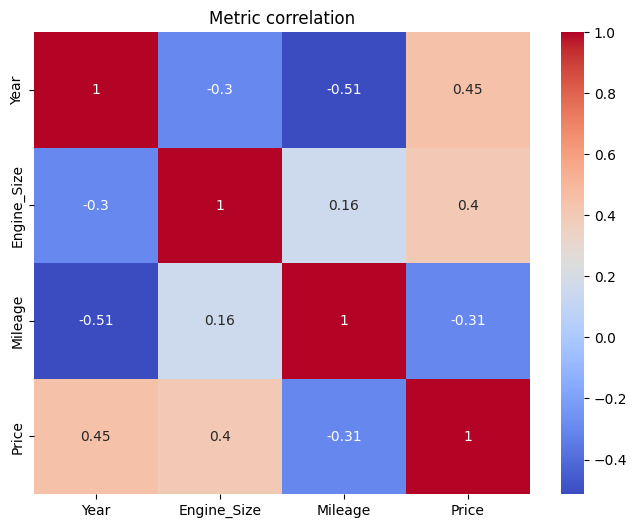

In [249]:
num_feature= df_seen.select_dtypes('number')

plt.figure(figsize=(8, 6))
sns.heatmap(num_feature.corr('spearman'), annot=True, cmap='coolwarm')
plt.title("Metric correlation", size=12)
plt.show()

Based on the correlation matrix above, it can be seen:
1. There is a **positive correlation between Year and Price of 0.45**. This shows that the **newer the year of the car, the higher the price tends** to be;
2. There is a **negative correlation between Price and Mileage of -0.31**. This shows that the **greater the Mileage, the lower the price tends** to be;
3. There is a **negative correlation between Year and Mileage of -0.51**. This shows that the n**ewer the year of the car, the lower the mileage**.

### **5.3 Relationship**

In [250]:
num_fitur= df_seen.select_dtypes('number')
fitur = num_fitur.drop('Price', axis=1).columns
target = 'Price'
sm_lm = sm.OLS(df_seen[target], sm.add_constant(df_seen[fitur]))
result = sm_lm.fit()

In [251]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     519.3
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          3.58e-270
Time:                        09:57:46   Log-Likelihood:                -36118.
No. Observations:                2910   AIC:                         7.224e+04
Df Residuals:                    2906   BIC:                         7.227e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.62e+07   6.96e+05    -23.265      

- R-squared: 0.349. This indicates that 34.9% of the variance in the dependent variable (Price) is explained by the independent variables (Year, Engine_Size, and Mileage) in the model.
- Adjusted R-squared: 0.348. This is a modified version of R-squared that accounts for the number of predictors in the model. It helps to avoid overfitting.
F-statistic: 519.3. This statistic tests the overall significance of the model. The associated p-value (3.58e-270) is very small, strongly suggesting that at least one of the independent variables is significantly related to the price.
- Individual Variable Significance
    - Coefficients: The table shows the estimated coefficients for each independent variable.
    - Intercept (const): -1.62e+07. This represents the predicted price when all the independent variables are zero. However, as noted in the "Notes" section, the condition number is large, which might indicate multicollinearity or other numerical issues.
    - Year: 8046.5545. This suggests that, on average, the price increases by approximately $8,046.55 per year.
    - Engine_Size: 2.468e+04. This indicates that, on average, an increase in engine size is associated with an increase in price of about $24,680.
    - Mileage: -0.1060. This suggests that, on average, an increase in mileage is associated with a decrease in price of about $0.11.
- P-values: The p-values for each variable are all very small (less than 0.05), indicating that each variable is statistically significant in predicting the price.

## **Section 6. Data Preparation**

Based on the analysis in EDA, the following preprocessing tasks will be applied to prepare the dataset for further analysis or modeling. Each step is designed to address specific characteristics of the data, ensuring it is well-processed for optimal performance.

**1. Encoding**<br>
We will apply encoding to transform categorical variables into numerical representations as follows:
- **One Hot Encoder** will be used for small values:
    - 'Gear_Type' : because there are only 2 values [Automatic, Manual]
    - 'Origin' : because there are only 3 values [Saudi, Gulf Arabic, Other]
    - 'Options' : because there are only 3 values [Full,Standart, Semi-Full]
- **Binary Encoder** will be used for many values:
    - 'Type' : because types have 311 different values.
    - 'Make' : because types have 55 different values.
    - 'Region' : because types have 27 different values.

**2. Scaling**<br>
We will apply **RobustScaler** to the following numerical features:

- 'Engine_Size'
- 'Mileage'
- 'Year'

robust scaler is chosen because the data contains a **large number of outliers**, and all numeric columns have a **non-normal distribution**.

**3. Binning Method** <br>
we use the **Binning method** to deal with columns that have only few value (values<10):
- 'Type' : ertiga value only have one and There are many more.
- 'Make' : lifan value only have one and There are many more.
- 'Region' :sabya value only have one and There are many more.

The way the rare label method works is by uniting a few values into one. then the results will be compared with methods that do not use rarelabels.

### **6.1 Initialization**

**Initialization Funcation**

- function for the **binning method whose (values < 10)**

In [252]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class BinningTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=10):
        """
        Initialize the BinningTransformer.
        
        Parameters:
        threshold (int): The frequency threshold for values considered as 'Others'.
        """
        
        self.threshold = threshold
        self.unique_values = None

    def fit(self, X, y=None):
        """
        Fit the transformer to the data, calculating the frequency of unique values in each column.
        
        Parameters:
        X (pandas.DataFrame or pandas.Series): The data to fit the transformer.
        y (optional): Target labels (not used in this transformer).
        
        Returns:
        self: The transformer object that has been fitted.
        
        Raises:
        ValueError: If the input is not a pandas.DataFrame or pandas.Series.
        """

        if isinstance(X, pd.DataFrame):
            self.unique_values = {col: X[col].value_counts() for col in X.columns}
        elif isinstance(X, pd.Series):
            self.unique_values = X.value_counts()
        else:
            raise ValueError("Input harus berupa pd.DataFrame atau pd.Series")
        return self

    def transform(self, X):
        """
        Transform the data based on the frequency of unique values, replacing infrequent values with 'Others'.
        
        Parameters:
        X (pandas.DataFrame or pandas.Series): The data to transform.
        
        Returns:
        pandas.DataFrame or pandas.Series: The transformed data.
        
        Raises:
        ValueError: If the input is not a pandas.DataFrame or pandas.Series.
        """

        X_transformed = X.copy()

        if isinstance(X_transformed, pd.DataFrame):
            for col in X_transformed.columns:
                if col in self.unique_values:
                    X_transformed[col] = X_transformed[col].apply(
                        lambda x: 'Others' if self.unique_values[col].get(x, 0) <= self.threshold else x
                    )
        elif isinstance(X_transformed, pd.Series):
            X_transformed = X_transformed.apply(
                lambda x: 'Others' if self.unique_values.get(x, 0) <= self.threshold else x
            )
        else:
            raise ValueError("Input harus berupa pd.DataFrame atau pd.Series")

        return X_transformed

    def get_feature_names_out(self, input_features=None):
        """
        Returns the feature names after transformation.
        
        Parameters:
        input_features (optional): List of input feature names (not used in this transformer).
        
        Returns:
        list: List of input feature names after transformation (currently unchanged).
        """
         
        return input_features if input_features is not None else []


**Define Feature and Target**

In [253]:
#training data
X_train= df_train.drop(['Price'],axis=1)
y_train = df_train['Price']

#test data
X_test= df_test.drop(['Price'],axis=1)
y_test = df_test['Price']

In [254]:
#training data
print("training data feature shape: ",X_train.shape)
print("training data target shape: ",y_train.shape)

#test data
print("test data feature shape: ",X_test.shape)
print("test data target shape: ",y_test.shape)


training data feature shape:  (2328, 9)
training data target shape:  (2328,)
test data feature shape:  (582, 9)
test data target shape:  (582,)


**6.2 Data Transformation (Feature Engineering)**

In this project, I tried two transformer objects:
1. **"trasnformer1"** : without binning method
2. **"trasnformer2"** : with binning method

In [255]:
# Base transformation
transformer1 = ColumnTransformer(transformers=[
    ('numeric_preprocessing', RobustScaler(), ['Engine_Size', 'Mileage','Year']),
    ('onehot_preprocessing', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options']),
    ('binary_preprocessing',BinaryEncoder(),['Type','Make', 'Region'])
], remainder='passthrough', verbose_feature_names_out=False)

#alt transformation
pipe_binary = Pipeline(steps=[
    ('Binning', BinningTransformer(threshold=10)),
    ('encoding_binary', BinaryEncoder())
])

transformer2 = ColumnTransformer(transformers=[
    ('numeric_preprocessing', RobustScaler(), ['Engine_Size', 'Mileage','Year']),
    ('onehot_preprocessing', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options']),
    ('binary_preprocessing',pipe_binary,['Type','Make', 'Region'])
], remainder='passthrough', verbose_feature_names_out=False)


**Transformer 1**



In [256]:
transformer1.fit(X_train,y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric_preprocessing', RobustScaler(),
                                 ['Engine_Size', 'Mileage', 'Year']),
                                ('onehot_preprocessing',
                                 OneHotEncoder(drop='first'),
                                 ['Gear_Type', 'Origin', 'Options']),
                                ('binary_preprocessing', BinaryEncoder(),
                                 ['Type', 'Make', 'Region'])],
                  verbose_feature_names_out=False)

**Transformer 2**

In [257]:
transformer2.fit(X_train,y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric_preprocessing', RobustScaler(),
                                 ['Engine_Size', 'Mileage', 'Year']),
                                ('onehot_preprocessing',
                                 OneHotEncoder(drop='first'),
                                 ['Gear_Type', 'Origin', 'Options']),
                                ('binary_preprocessing',
                                 Pipeline(steps=[('Binning',
                                                  BinningTransformer()),
                                                 ('encoding_binary',
                                                  BinaryEncoder())]),
                                 ['Type', 'Make', 'Region'])],
                  verbose_feature_names_out=False)

**6.3 Overview**

**Overview Transformer 1 Without Binning method**

In [258]:
## Overview result after transformation

X_train_pre = transformer1.transform(X_train)
X_test_pre = transformer1.transform(X_test)

# DataFrame
X_train_pre = pd.DataFrame(X_train_pre, columns=transformer1.get_feature_names_out())
X_test_pre = pd.DataFrame(X_test_pre, columns=transformer1.get_feature_names_out())

In [259]:
X_test_pre

,Engine_Size,Mileage,Year,Gear_Type_Manual,Origin_Other,Origin_Saudi,Options_Semi Full,Options_Standard,Type_0,Type_1,...,Make_1,Make_2,Make_3,Make_4,Make_5,Region_0,Region_1,Region_2,Region_3,Region_4
0,-0.15,-0.059900,0.00,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.95,-0.338462,0.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.05,-0.415385,0.00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.10,3.376662,-0.50,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,0.40,2.038462,-1.25,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,0.65,-0.762308,1.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
578,-0.60,-0.376923,1.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
579,-0.10,0.009885,0.75,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
580,-0.65,-0.494231,0.75,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


**Overview Transformer 2 With Rare Label Handling**

In [260]:
## Overview result after transformation

X_train_pre = transformer2.transform(X_train)
X_test_pre = transformer2.transform(X_test)

# DataFrame
X_train_pre = pd.DataFrame(X_train_pre, columns=transformer2.get_feature_names_out())
X_test_pre = pd.DataFrame(X_test_pre, columns=transformer2.get_feature_names_out())

In [261]:
X_test_pre

,Engine_Size,Mileage,Year,Gear_Type_Manual,Origin_Other,Origin_Saudi,Options_Semi Full,Options_Standard,Type_0,Type_1,...,Make_0,Make_1,Make_2,Make_3,Make_4,Region_0,Region_1,Region_2,Region_3,Region_4
0,-0.15,-0.059900,0.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.95,-0.338462,0.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.05,-0.415385,0.00,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.10,3.376662,-0.50,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
4,0.40,2.038462,-1.25,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,0.65,-0.762308,1.25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
578,-0.60,-0.376923,1.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
579,-0.10,0.009885,0.75,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
580,-0.65,-0.494231,0.75,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## **Section 7. Model Development**

**7.1 Initialization**

- **Workflow of the experimet to get best model**

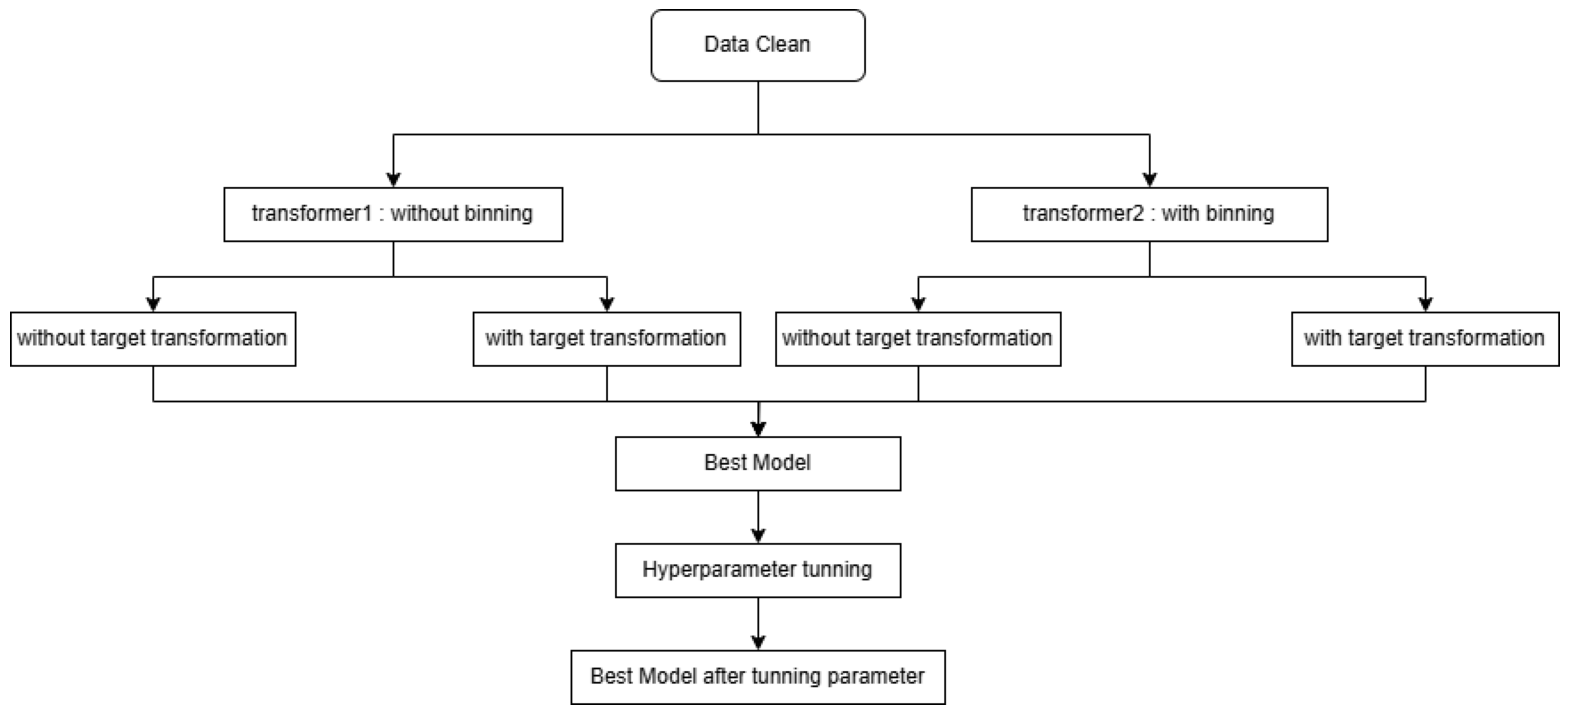

In [262]:
# Load and display an image
plt.figure(figsize=(20, 10))
img = mpimg.imread(r'C:\Users\ghais\OneDrive\Documents\Purwadhika bootcamp\Modul 3. machine learning\Capstone\Predict-used-cars-price-in-Saudi-Arabia-s\assets\Workflow.png')
plt.imshow(img)
plt.axis('off')  # Optional: Hide axes
plt.show()


- **Initialization Function**

- function for get name model in target transformation

In [263]:
def get_model_name(transformed_regressor):
    """
    Retrieve the name of the model used in the transformed regressor.

    This function extracts and returns the class name of the regressor object
    that is embedded within the transformed regressor object.

    Parameters:
    transformed_regressor (object): An object that contains a regressor, 
                                     typically after some transformation.

    Returns:
    str: The name of the regressor model class.
    """
    
    return type(transformed_regressor.regressor).__name__

- function for prosess the result and to get model evaluation

In [264]:
def process_result(data, use_tt=False):
    """
    Process the result of model evaluations, including renaming columns and extracting model names.

    Depending on the value of `use_tt`, this function either extracts model names from the regressor 
    object or from the classifier's string representation. It also renames columns in the data for better readability.

    Parameters:
    data (pandas.DataFrame): The data containing model evaluation results.
    use_tt (bool): Flag to determine how to extract model names. 
                   If True, extracts from the `param_Classifier` using the `get_model_name` function.
                   If False, extracts from the string representation of `param_Classifier`.

    Returns:
    pandas.DataFrame: The processed data with renamed columns and model names.
    """
        
    if use_tt:
        data['model_name'] = data['param_Classifier'].apply(get_model_name)
        data.rename(columns={
            'mean_train_neg_root_mean_squared_error': 'Mean Train RMSE',
            'mean_test_neg_root_mean_squared_error': 'Mean Test RMSE',
            'std_train_neg_root_mean_squared_error': 'Std Train RMSE',
            'std_test_neg_root_mean_squared_error': 'Std Test RMSE',
            'mean_train_neg_mean_absolute_error': 'Mean Train MAE',
            'mean_test_neg_mean_absolute_error': 'Mean Test MAE',
            'std_train_neg_mean_absolute_error': 'Std Train MAE',
            'std_test_neg_mean_absolute_error': 'Std Test MAE',
            'mean_train_neg_mean_absolute_percentage_error': 'Mean Train MAPE',
            'mean_test_neg_mean_absolute_percentage_error': 'Mean Test MAPE',
            'std_train_neg_mean_absolute_percentage_error': 'Std Train MAPE',
            'std_test_neg_mean_absolute_percentage_error': 'Std Test MAPE',
            'mean_train_r2': 'Mean Train R2',
            'mean_test_r2': 'Mean Test R2',
            'std_train_r2': 'Std Train R2',
            'std_test_r2': 'Std Test R2'
            }, inplace=True)
    else:
        data['param_Classifier'] = data['param_Classifier'].astype(str)
        data['model_name'] = data['param_Classifier'].str.extract(r'([A-Za-z]+)') 
        data.rename(columns={
            'mean_train_neg_root_mean_squared_error': 'Mean Train RMSE',
            'mean_test_neg_root_mean_squared_error': 'Mean Test RMSE',
            'std_train_neg_root_mean_squared_error': 'Std Train RMSE',
            'std_test_neg_root_mean_squared_error': 'Std Test RMSE',
            'mean_train_neg_mean_absolute_error': 'Mean Train MAE',
            'mean_test_neg_mean_absolute_error': 'Mean Test MAE',
            'std_train_neg_mean_absolute_error': 'Std Train MAE',
            'std_test_neg_mean_absolute_error': 'Std Test MAE',
            'mean_train_neg_mean_absolute_percentage_error': 'Mean Train MAPE',
            'mean_test_neg_mean_absolute_percentage_error': 'Mean Test MAPE',
            'std_train_neg_mean_absolute_percentage_error': 'Std Train MAPE',
            'std_test_neg_mean_absolute_percentage_error': 'Std Test MAPE',
            'mean_train_r2': 'Mean Train R2',
            'mean_test_r2': 'Mean Test R2',
            'std_train_r2': 'Std Train R2',
            'std_test_r2': 'Std Test R2'
            }, inplace=True)

- function for display the result mean and std for (MAE, RMSE,MAPE, R2)

In [265]:
def show_result(data, mean=True):
    """
    Display the results of model evaluations, either mean or standard deviation values.

    This function returns a subset of the input DataFrame, showing either the mean or standard deviation
    values of various evaluation metrics (RMSE, MAE, MAPE, and R2) for different models. 
    The user can choose to display either the mean or standard deviation results using the `mean` parameter.

    Parameters:
    data (pandas.DataFrame): The data containing the evaluation results for the models.
    mean (bool): If True, the function returns the mean evaluation metrics. 
                 If False, it returns the standard deviation of the metrics.

    Returns:
    pandas.DataFrame: A DataFrame containing the selected evaluation metrics, rounded to 2 decimal places.
    """
    
    if mean:
        return data[['model_name','Mean Train RMSE','Mean Test RMSE',
                     'Mean Train MAE','Mean Test MAE',
                     'Mean Train MAPE','Mean Test MAPE',
                     'Mean Train R2','Mean Test R2'
                     ]].round(2)
    else:
        return data[['model_name','Std Train RMSE','Std Test RMSE',
                    'Std Train MAE','Std Test MAE',
                    'Std Train MAPE','Std Test MAPE',
                    'Std Train R2','Std Test R2'
                    ]].round(2)

**7.2 Developing the Model Pipeline**

In [266]:
# Create your Pipeline and list process
base_clf = Pipeline(steps=[
    ("FeatureEngineering", transformer1),
    ("Classifier", None)
])

alt_clf = Pipeline(steps=[
    ("FeatureEngineering", transformer2),
    ("Classifier", None)
])

**7.3 Model Benchmarking (Comparing model base performance)**

Without Target Transformation

In [267]:
dtr=DecisionTreeRegressor(random_state=42)
knnr=KNeighborsRegressor()
linreg=LinearRegression()
rf  = RandomForestRegressor(random_state= 42)
xgb = XGBRegressor(random_state= 42)
gb = GradientBoostingRegressor(random_state=42)
ada = AdaBoostRegressor(random_state=42)

list_model=[dtr,knnr,linreg,rf,xgb,gb,ada]

With Target Transformation

In [268]:
tt_dtr = TransformedTargetRegressor(dtr, func=np.log, inverse_func=np.exp)
tt_knnr = TransformedTargetRegressor(knnr, func=np.log, inverse_func=np.exp)
tt_linreg = TransformedTargetRegressor(linreg, func=np.log, inverse_func=np.exp)
tt_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
tt_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
tt_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
tt_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)

list_models=[tt_dtr,tt_knnr,tt_linreg,tt_rf,tt_xgb,tt_gb,tt_ada]

**Model 1**
- Transformer 1 : without Rare Label
- Model : Without Target transformation

In [269]:
benchmark1=GridSearchCV(estimator= base_clf,
                       param_grid={'Classifier':list_model},
                       scoring=['neg_root_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error','r2'],
                       refit='r2',
                       cv=KFold(shuffle=True, random_state=42),
                       return_train_score=True,
                       verbose=1)

In [270]:
benchmark1.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric_preprocessing',
                                                                         RobustScaler(),
                                                                         ['Engine_Size',
                                                                          'Mileage',
                                                                          'Year']),
                                                                        ('onehot_preprocessing',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('binary_preprocessing'...
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...),
                                        GradientBoostingRegressor(random_state=42),
                                        AdaBoostRegressor(random_state=42)]},
             refit='r2', return_train_score=True,
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error', 'r2'],
             verbose=1)

In [271]:
benchmark1.best_score_

np.float64(0.7351053595542908)

In [272]:
result_benchmark1=pd.DataFrame(benchmark1.cv_results_)
process_result(result_benchmark1)

print("Result benchmark 1 (Mean)")
result_benchmark1_mean=show_result(result_benchmark1.sort_values(by='Mean Test R2', ascending=False)).reset_index(drop=True)
display(result_benchmark1_mean)

print("Result benchmark 1 (Std)")
result_benchmark1_std=show_result(result_benchmark1.sort_values(by='Mean Test R2', ascending=False)).reset_index(drop=True)
display(result_benchmark1_std)

Result benchmark 1 (Mean)


,model_name,Mean Train RMSE,Mean Test RMSE,Mean Train MAE,Mean Test MAE,Mean Train MAPE,Mean Test MAPE,Mean Train R2,Mean Test R2
0,XGBRegressor,-4008.54,-38395.08,-2738.12,-18511.45,-0.05,-0.28,1.00,0.74
1,KNeighborsRegressor,-32862.12,-39821.09,-16598.31,-20699.97,-0.27,-0.34,0.81,0.71
2,RandomForestRegressor,-15221.53,-40389.50,-7223.53,-19504.26,-0.11,-0.30,0.96,0.71
3,GradientBoostingRegressor,-32042.28,-42342.17,-18894.86,-22474.23,-0.28,-0.34,0.82,0.68
4,DecisionTreeRegressor,-222.42,-51827.48,-11.97,-23627.95,-0.00,-0.35,1.00,0.51
5,LinearRegression,-53295.18,-53869.91,-33021.59,-33585.40,-0.63,-0.63,0.49,0.48
6,AdaBoostRegressor,-66185.46,-72280.19,-58543.24,-60832.05,-1.33,-1.36,0.21,0.05


Result benchmark 1 (Std)


,model_name,Mean Train RMSE,Mean Test RMSE,Mean Train MAE,Mean Test MAE,Mean Train MAPE,Mean Test MAPE,Mean Train R2,Mean Test R2
0,XGBRegressor,-4008.54,-38395.08,-2738.12,-18511.45,-0.05,-0.28,1.00,0.74
1,KNeighborsRegressor,-32862.12,-39821.09,-16598.31,-20699.97,-0.27,-0.34,0.81,0.71
2,RandomForestRegressor,-15221.53,-40389.50,-7223.53,-19504.26,-0.11,-0.30,0.96,0.71
3,GradientBoostingRegressor,-32042.28,-42342.17,-18894.86,-22474.23,-0.28,-0.34,0.82,0.68
4,DecisionTreeRegressor,-222.42,-51827.48,-11.97,-23627.95,-0.00,-0.35,1.00,0.51
5,LinearRegression,-53295.18,-53869.91,-33021.59,-33585.40,-0.63,-0.63,0.49,0.48
6,AdaBoostRegressor,-66185.46,-72280.19,-58543.24,-60832.05,-1.33,-1.36,0.21,0.05


**Model 2**
- Transformer 2 : with Rare Label
- Model : Without Target transformation

In [273]:
benchmark2=GridSearchCV(estimator= alt_clf,
                       param_grid={'Classifier':list_model},
                       scoring=['neg_root_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error','r2'],
                       refit='r2',
                       cv=KFold(shuffle=True, random_state=42),
                       return_train_score=True,
                       verbose=1)

In [274]:
benchmark2.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric_preprocessing',
                                                                         RobustScaler(),
                                                                         ['Engine_Size',
                                                                          'Mileage',
                                                                          'Year']),
                                                                        ('onehot_preprocessing',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('binary_preprocessing'...
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...),
                                        GradientBoostingRegressor(random_state=42),
                                        AdaBoostRegressor(random_state=42)]},
             refit='r2', return_train_score=True,
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error', 'r2'],
             verbose=1)

In [275]:
benchmark2.best_score_

np.float64(0.7091177344322205)

In [276]:
result_benchmark2=pd.DataFrame(benchmark2.cv_results_)
process_result(result_benchmark2)

print("Result benchmark 2 (Mean)")
result_benchmark2_mean=show_result(result_benchmark2.sort_values(by='Mean Test R2', ascending=False)).reset_index(drop=True)
display(result_benchmark2_mean)

print("Result benchmark 2 (Std)")
result_benchmark2_std=show_result(result_benchmark2.sort_values(by='Mean Test R2', ascending=False), mean=False).reset_index(drop=True)
display(result_benchmark2_std)

Result benchmark 2 (Mean)


,model_name,Mean Train RMSE,Mean Test RMSE,Mean Train MAE,Mean Test MAE,Mean Train MAPE,Mean Test MAPE,Mean Train R2,Mean Test R2
0,XGBRegressor,-4592.89,-40088.47,-3124.34,-19323.93,-0.05,-0.29,1.00,0.71
1,KNeighborsRegressor,-32223.47,-40307.16,-16449.02,-20478.83,-0.27,-0.33,0.81,0.71
2,GradientBoostingRegressor,-32183.35,-40292.92,-18587.75,-21753.69,-0.28,-0.33,0.81,0.71
3,RandomForestRegressor,-15221.98,-41574.75,-7184.06,-19370.06,-0.11,-0.29,0.96,0.69
4,LinearRegression,-52680.34,-53580.80,-32626.26,-33101.48,-0.62,-0.63,0.50,0.48
5,DecisionTreeRegressor,-222.42,-55871.69,-11.97,-24720.76,-0.00,-0.36,1.00,0.43
6,AdaBoostRegressor,-64675.35,-70379.96,-57294.89,-58887.54,-1.31,-1.33,0.25,0.09


Result benchmark 2 (Std)


,model_name,Std Train RMSE,Std Test RMSE,Std Train MAE,Std Test MAE,Std Train MAPE,Std Test MAPE,Std Train R2,Std Test R2
0,XGBRegressor,189.78,4862.15,112.47,1944.41,0.00,0.03,0.00,0.05
1,KNeighborsRegressor,1906.47,5350.49,466.98,1936.20,0.01,0.02,0.02,0.05
2,GradientBoostingRegressor,1738.07,6080.55,1015.30,3102.30,0.01,0.04,0.02,0.06
3,RandomForestRegressor,1065.79,4624.45,363.50,1989.16,0.00,0.03,0.01,0.04
4,LinearRegression,1713.45,5236.13,639.56,2373.23,0.01,0.04,0.03,0.04
5,DecisionTreeRegressor,49.92,7161.71,3.29,1742.45,0.00,0.02,0.00,0.14
6,AdaBoostRegressor,5503.71,5915.56,5220.62,5722.32,0.13,0.14,0.13,0.19


**Model 3**
- Transformer 1 : without Rare Label
- Model : With Target transformation

In [277]:
benchmark3=GridSearchCV(estimator= base_clf,
                       param_grid={'Classifier':list_models},
                       scoring=['neg_root_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error','r2'],
                       refit='r2',
                       cv=KFold(shuffle=True, random_state=42),
                       return_train_score=True,
                       verbose=1)

In [278]:
benchmark3.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric_preprocessing',
                                                                         RobustScaler(),
                                                                         ['Engine_Size',
                                                                          'Mileage',
                                                                          'Year']),
                                                                        ('onehot_preprocessing',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('binary_preprocessing'...
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=GradientBoostingRegressor(random_state=42)),
                                        TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=AdaBoostRegressor(random_state=42))]},
             refit='r2', return_train_score=True,
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error', 'r2'],
             verbose=1)

In [279]:
benchmark3.best_score_

np.float64(0.7605988621711731)

In [280]:
result_benchmark3=pd.DataFrame(benchmark3.cv_results_)
process_result(result_benchmark3, use_tt=True)

print("Result benchmark 3 (Mean)")
result_benchmark3_mean=show_result(result_benchmark3.sort_values(by='Mean Test R2', ascending=False)).reset_index(drop=True)
display(result_benchmark3_mean)

print("Result benchmark 3 (Std)")
result_benchmark3_std=show_result(result_benchmark3.sort_values(by='Mean Test R2', ascending=False), mean=False).reset_index(drop=True)
display(result_benchmark3_std)

Result benchmark 3 (Mean)


,model_name,Mean Train RMSE,Mean Test RMSE,Mean Train MAE,Mean Test MAE,Mean Train MAPE,Mean Test MAPE,Mean Train R2,Mean Test R2
0,XGBRegressor,-6151.54,-36479.30,-3086.51,-17220.14,-0.04,-0.24,0.99,0.76
1,RandomForestRegressor,-18568.31,-39535.39,-7109.72,-18037.11,-0.08,-0.24,0.94,0.72
2,KNeighborsRegressor,-34823.73,-40153.80,-15986.61,-19923.99,-0.23,-0.30,0.78,0.71
3,GradientBoostingRegressor,-35813.55,-42682.64,-17832.16,-20568.88,-0.21,-0.25,0.77,0.67
4,LinearRegression,-48895.12,-49402.99,-25159.25,-25754.89,-0.32,-0.33,0.57,0.56
5,AdaBoostRegressor,-48339.96,-50737.76,-27817.70,-28755.83,-0.37,-0.39,0.58,0.54
6,DecisionTreeRegressor,-222.50,-60714.36,-11.97,-26098.16,-0.00,-0.38,1.00,0.33


Result benchmark 3 (Std)


,model_name,Std Train RMSE,Std Test RMSE,Std Train MAE,Std Test MAE,Std Train MAPE,Std Test MAPE,Std Train R2,Std Test R2
0,XGBRegressor,243.37,4612.67,98.73,1592.81,0.00,0.02,0.00,0.04
1,RandomForestRegressor,589.70,6891.01,310.78,2347.46,0.00,0.02,0.00,0.07
2,KNeighborsRegressor,1501.99,7906.10,421.26,2382.35,0.01,0.03,0.01,0.08
3,GradientBoostingRegressor,680.89,6096.21,743.92,2513.70,0.01,0.02,0.01,0.05
4,LinearRegression,2151.05,7078.78,1055.76,3273.60,0.01,0.04,0.04,0.07
5,AdaBoostRegressor,748.93,5692.27,906.53,2590.55,0.02,0.03,0.02,0.05
6,DecisionTreeRegressor,49.95,9139.19,3.29,3879.44,0.00,0.05,0.00,0.15


**Model 4**
- Transformer 2 : with Rare Label
- Model : With Target transformation

In [281]:
benchmark4=GridSearchCV(estimator= alt_clf,
                       param_grid={'Classifier':list_models},
                       scoring=['neg_root_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error','r2'],
                       refit='r2',
                       cv=KFold(shuffle=True, random_state=42),
                       return_train_score=True,
                       verbose=1)

In [282]:
benchmark4.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric_preprocessing',
                                                                         RobustScaler(),
                                                                         ['Engine_Size',
                                                                          'Mileage',
                                                                          'Year']),
                                                                        ('onehot_preprocessing',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('binary_preprocessing'...
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=GradientBoostingRegressor(random_state=42)),
                                        TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=AdaBoostRegressor(random_state=42))]},
             refit='r2', return_train_score=True,
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error', 'r2'],
             verbose=1)

In [283]:
benchmark4.best_score_

np.float64(0.7892534017562867)

In [284]:
result_benchmark4=pd.DataFrame(benchmark4.cv_results_)
process_result(result_benchmark4, use_tt=True)

print("Result benchmark 4 (Mean)")
result_benchmark4_mean=show_result(result_benchmark4.sort_values(by='Mean Test R2', ascending=False)).reset_index(drop=True)
display(result_benchmark4_mean)

print("Result benchmark 4 (Std)")
result_benchmark4_std=show_result(result_benchmark4.sort_values(by='Mean Test R2', ascending=False), mean=False).reset_index(drop=True)
display(result_benchmark4_std)

Result benchmark 4 (Mean)


,model_name,Mean Train RMSE,Mean Test RMSE,Mean Train MAE,Mean Test MAE,Mean Train MAPE,Mean Test MAPE,Mean Train R2,Mean Test R2
0,XGBRegressor,-6851.06,-34229.92,-3400.08,-16323.13,-0.04,-0.22,0.99,0.79
1,GradientBoostingRegressor,-35517.04,-39934.95,-17302.67,-19529.81,-0.21,-0.24,0.77,0.71
2,RandomForestRegressor,-18297.51,-40017.68,-7013.66,-17913.18,-0.08,-0.24,0.94,0.71
3,KNeighborsRegressor,-33075.61,-40096.64,-15686.99,-19424.03,-0.22,-0.28,0.80,0.71
4,LinearRegression,-48326.60,-49765.42,-24912.12,-25633.67,-0.32,-0.32,0.58,0.56
5,AdaBoostRegressor,-47871.10,-50018.04,-27615.42,-28237.36,-0.37,-0.38,0.59,0.55
6,DecisionTreeRegressor,-222.50,-60158.37,-11.97,-25284.49,-0.00,-0.34,1.00,0.35


Result benchmark 4 (Std)


,model_name,Std Train RMSE,Std Test RMSE,Std Train MAE,Std Test MAE,Std Train MAPE,Std Test MAPE,Std Train R2,Std Test R2
0,XGBRegressor,412.49,5410.07,132.77,1118.16,0.00,0.01,0.00,0.04
1,GradientBoostingRegressor,1451.21,4901.42,513.98,2135.96,0.00,0.02,0.02,0.04
2,RandomForestRegressor,1007.96,6508.82,290.65,2171.91,0.00,0.02,0.01,0.06
3,KNeighborsRegressor,1622.03,6845.65,380.03,2115.02,0.00,0.02,0.01,0.07
4,LinearRegression,2139.03,5758.63,867.11,3079.79,0.01,0.03,0.04,0.05
5,AdaBoostRegressor,868.33,6411.25,1074.41,2930.82,0.02,0.03,0.02,0.07
6,DecisionTreeRegressor,49.95,7960.41,3.29,3746.71,0.00,0.04,0.00,0.12


**Compare Model**

In [285]:
result_benchmark4=show_result(result_benchmark4.sort_values(by='Mean Test R2', ascending=False), mean=False).reset_index(drop=True)

In [286]:
compare_result= pd.DataFrame({'benchmark1':result_benchmark1_mean.iloc[0].to_list(),
                              'benchmark2':result_benchmark2_mean.iloc[0].to_list(),
                              'benchmark3':result_benchmark3_mean.iloc[0].to_list(),
                              'benchmark4':result_benchmark4_mean.iloc[0].to_list(),
                               }).T

compare_result.columns = ['Model Name', 'Train RMSE', ' Test RMSE', 'Train MAE', ' Test MAE', 'Train MAPE', 'Test MAPE', 'Train R2', 'Test R2']
compare_result

,Model Name,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MAPE,Test MAPE,Train R2,Test R2
benchmark1,XGBRegressor,-4008.54,-38395.08,-2738.12,-18511.45,-0.05,-0.28,1.0,0.74
benchmark2,XGBRegressor,-4592.89,-40088.47,-3124.34,-19323.93,-0.05,-0.29,1.0,0.71
benchmark3,XGBRegressor,-6151.54,-36479.3,-3086.51,-17220.14,-0.04,-0.24,0.99,0.76
benchmark4,XGBRegressor,-6851.06,-34229.92,-3400.08,-16323.13,-0.04,-0.22,0.99,0.79


In [327]:
benchmark4.best_params_

{'Classifier': TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                            regressor=XGBRegressor(base_score=None, booster=None,
                                                   callbacks=None,
                                                   colsample_bylevel=None,
                                                   colsample_bynode=None,
                                                   colsample_bytree=None,
                                                   device=None,
                                                   early_stopping_rounds=None,
                                                   enable_categorical=False,
                                                   eval_metric=None,
                                                   feature_types=None,
                                                   gamma=None, grow_policy=None,
                                                   importance_type=None,
                        

**7.4 Tune Model**

In [287]:
# Best model: Logistic Regression 

clf_xgb = Pipeline(steps=[
    ('Featureengineering', transformer2),
    ('Classifier',tt_xgb)
])

In [328]:
param_grid = {
    'Classifier__regressor__max_depth': [3, 5, 9],
    'Classifier__regressor__learning_rate': [0.01, 0.1, 0.3],
    'Classifier__regressor__n_estimators': [100, 500, 750],
    'Classifier__regressor__subsample': [0.5, 1.0]
}

In [330]:
# Create GridSearch Object

gridSearch_tunning = GridSearchCV(
    estimator=clf_xgb,
    param_grid=param_grid,
    cv=KFold(n_splits=5, random_state=42, shuffle=True),
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'], 
    refit = 'r2',
    verbose=1, 
    n_jobs=-1,
    return_train_score=True
)

In [331]:
gridSearch_tunning.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('Featureengineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric_preprocessing',
                                                                         RobustScaler(),
                                                                         ['Engine_Size',
                                                                          'Mileage',
                                                                          'Year']),
                                                                        ('onehot_preprocessing',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('binary_preprocessing'...
             param_grid={'Classifier__regressor__learning_rate': [0.01, 0.1,
                                                                  0.3],
                         'Classifier__regressor__max_depth': [3, 5, 9],
                         'Classifier__regressor__n_estimators': [100, 500, 750],
                         'Classifier__regressor__subsample': [0.5, 1.0]},
             refit='r2', return_train_score=True,
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error', 'r2'],
             verbose=1)

In [332]:
result_tunning=pd.DataFrame(gridSearch_tunning.cv_results_)
result_tunning.rename({'param_Classifier__regressor__learning_rate':'learning_rate' ,	'param_Classifier__regressor__max_depth':'max_depth',	
                'param_Classifier__regressor__n_estimators':'n_estimators', 'param_Classifier__regressor__subsample':'subsample',
                'mean_train_neg_root_mean_squared_error': 'Mean Train RMSE', 'mean_test_neg_root_mean_squared_error': 'Mean Test RMSE',
                'std_train_neg_root_mean_squared_error': 'Std Train RMSE', 'std_test_neg_root_mean_squared_error': 'Std Test RMSE',
                'mean_train_neg_mean_absolute_error': 'Mean Train MAE', 'mean_test_neg_mean_absolute_error': 'Mean Test MAE',
                'std_train_neg_mean_absolute_error': 'Std Train MAE', 'std_test_neg_mean_absolute_error': 'Std Test MAE',
                'mean_train_neg_mean_absolute_percentage_error': 'Mean Train MAPE', 'mean_test_neg_mean_absolute_percentage_error': 'Mean Test MAPE',
                'std_train_neg_mean_absolute_percentage_error': 'Std Train MAPE','std_test_neg_mean_absolute_percentage_error': 'Std Test MAPE',
                'mean_train_r2': 'Mean Train R2', 'mean_test_r2': 'Mean Test R2', 'std_train_r2': 'Std Train R2', 'std_test_r2': 'Std Test R2'}, axis=1, inplace=True)
result_tunning[['learning_rate', 'max_depth', 'n_estimators', 'subsample',
                'Mean Train RMSE', 'Mean Test RMSE', 'Std Train RMSE', 'Std Test RMSE',
                'Mean Train MAE', 'Mean Test MAE', 'Std Train MAE', 'Std Test MAE', 
                'Mean Train MAPE', 'Mean Test MAPE', 'Std Train MAPE', 'Std Test MAPE', 
                'Mean Train R2', 'Mean Test R2', 'Std Train R2', 'Std Test R2']].sort_values(by='Mean Test R2', ascending=False).reset_index(drop=True)

,learning_rate,max_depth,n_estimators,subsample,Mean Train RMSE,Mean Test RMSE,Std Train RMSE,Std Test RMSE,Mean Train MAE,Mean Test MAE,Std Train MAE,Std Test MAE,Mean Train MAPE,Mean Test MAPE,Std Train MAPE,Std Test MAPE,Mean Train R2,Mean Test R2,Std Train R2,Std Test R2
0,0.10,5,750,1.0,-5553.183837,-33105.640917,237.020936,4080.362603,-2774.743693,-15930.941660,72.436057,1266.778124,-0.032968,-0.213658,0.000629,0.012927,0.994468,0.803094,0.000450,0.026670
1,0.10,5,500,1.0,-8622.003900,-33134.690668,544.069394,4422.186268,-4259.866604,-15896.099471,149.353908,1403.401267,-0.050411,-0.212820,0.001589,0.014317,0.986661,0.802714,0.001393,0.030710
2,0.30,3,500,1.0,-15349.607390,-33289.383097,966.484020,4768.848303,-7740.478531,-16374.444282,253.498892,1428.835041,-0.092169,-0.220090,0.002472,0.015389,0.957695,0.799707,0.004769,0.040071
3,0.10,3,750,0.5,-20167.556533,-33235.636483,861.186134,5455.431415,-10155.439019,-16651.317760,56.671499,1797.638170,-0.122080,-0.218573,0.002945,0.018316,0.927105,0.799541,0.004808,0.049052
4,0.30,3,750,1.0,-12296.404652,-33321.119336,766.967354,4462.476456,-6248.865269,-16448.904645,250.400621,1415.956848,-0.073930,-0.222455,0.002333,0.015522,0.972849,0.799389,0.003026,0.036858
5,0.30,5,100,1.0,-12718.927547,-33423.553097,271.607124,4790.554843,-6368.033900,-16309.257502,85.063096,1582.054606,-0.075406,-0.218242,0.001783,0.013446,0.971009,0.798238,0.001154,0.040334
6,0.10,5,500,0.5,-7945.571065,-33653.910204,330.240380,3627.625232,-4152.163444,-15831.391185,126.915173,876.174476,-0.049640,-0.210294,0.001507,0.011364,0.988682,0.796377,0.000790,0.022129
7,0.30,5,500,1.0,-1427.534928,-33651.807713,126.001280,4131.197521,-757.973017,-16355.415223,61.987980,1291.897206,-0.009363,-0.220322,0.000769,0.011487,0.999630,0.795813,0.000072,0.032002
8,0.30,5,750,1.0,-579.901166,-33685.810937,28.180862,4108.825306,-286.305073,-16398.474726,14.619156,1280.967018,-0.003645,-0.220777,0.000188,0.011226,0.999940,0.795438,0.000007,0.031609
9,0.10,3,750,1.0,-21476.889971,-33776.958178,676.931383,4893.694119,-10540.640057,-16733.036610,90.999651,1885.011011,-0.125581,-0.218017,0.001730,0.019888,0.917335,0.793698,0.004297,0.042170


**7.5 Analyze Model**

- Evaluate model on data testing
- Residual Analysis
- Learning Curve Inspection

**Evaluate model on data testing**

In [318]:
gridSearch_tunning.fit(X_test, y_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('Featureengineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric_preprocessing',
                                                                         RobustScaler(),
                                                                         ['Engine_Size',
                                                                          'Mileage',
                                                                          'Year']),
                                                                        ('onehot_preprocessing',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options']),
                                                                        ('binary_preprocessing'...
                                                                                          random_state=42, ...)))]),
             n_jobs=-1,
             param_grid={'Classifier__regressor__learning_rate': [0.01, 0.1,
                                                                  0.2],
                         'Classifier__regressor__max_depth': [3, 5, 7],
                         'Classifier__regressor__n_estimators': [100, 200, 300],
                         'Classifier__regressor__subsample': [0.8, 1.0]},
             refit='r2',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error', 'r2'],
             verbose=1)

In [319]:
best_params = gridSearch_tunning.best_params_
best_score = gridSearch_tunning.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

gridSearch_tunning.best_estimator_

Best Parameters: {'Classifier__regressor__learning_rate': 0.1, 'Classifier__regressor__max_depth': 5, 'Classifier__regressor__n_estimators': 200, 'Classifier__regressor__subsample': 0.8}
Best Score: 0.6588978171348572


Pipeline(steps=[('Featureengineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric_preprocessing',
                                                  RobustScaler(),
                                                  ['Engine_Size', 'Mileage',
                                                   'Year']),
                                                 ('onehot_preprocessing',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('binary_preprocessing',
                                                  Pipeline(steps=[('Binning',
                                                                   BinningTransformer()),
                                                                  ('encoding_binary',
                                                                   Bina...
                                                                   gamma=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.1,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=5,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=200,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=42, ...)))])

**Residual analisis**

**7.6 Model Explanation and Interpretation**
- Feature Importance (Tree Based Model) / Coefficient Regression (Regression Based Model)
- SHAP Value identification
- Counter Factual Analysis

## **Section 8. Model Deployment**

## **Section 9. Model Implementation**

**9.1 How to implement the model ?**


**9.2 What are the limitations of the model ?**

**9.3 Business Calculation (Simulation using unseen data)**

## **Section 10. Conclusion and Recommendation**

**10.1 Conclusion**
- Conclusion (Model)
- Conclusion (Business)

**10.2 Recommendation**
- Recommendation (Model)
- Recommendation (Business)